# 1. Import required libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")
import warnings
warnings.filterwarnings("ignore")

# Project
## E-commerce Fraud Detection Analysis 

In [72]:

df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\synthetic_ecommerce_churn_dataset.csv")

In [73]:
df.columns

Index(['customer_id', 'age', 'gender', 'country', 'avg_order_value',
       'total_orders', 'last_purchase', 'is_fraudulent', 'preferred_category',
       'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk'],
      dtype='object')

In [74]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


# ===============================================================
# Advanced EDA and Machine Learning on E-commerce Customer Dataset
# ===============================================================

# Data Info

In [75]:
df.head()

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


In [76]:
df["preferred_category"].astype("category")

0            Beauty
1       Electronics
2            Sports
3       Electronics
4           Fashion
           ...     
4995    Electronics
4996           Home
4997         Beauty
4998        Fashion
4999           Home
Name: preferred_category, Length: 5000, dtype: category
Categories (5, object): ['Beauty', 'Electronics', 'Fashion', 'Home', 'Sports']

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         5000 non-null   object 
 1   age                 5000 non-null   int64  
 2   gender              5000 non-null   object 
 3   country             5000 non-null   object 
 4   avg_order_value     4750 non-null   float64
 5   total_orders        5000 non-null   int64  
 6   last_purchase       5000 non-null   int64  
 7   is_fraudulent       5000 non-null   int64  
 8   preferred_category  5000 non-null   object 
 9   email_open_rate     4750 non-null   float64
 10  customer_since      5000 non-null   object 
 11  loyalty_score       5000 non-null   int64  
 12  churn_risk          5000 non-null   float64
dtypes: float64(3), int64(5), object(5)
memory usage: 507.9+ KB


In [78]:
df.shape

(5000, 13)

In [79]:

# 3. Preview the data
print(df.head(10))
print(df.info())
print(df.describe())

# 4. Check for missing values
print(df.isnull().sum())


  customer_id  age  gender    country  avg_order_value  total_orders  \
0   CUST_8270   30  Female     Brazil           101.08             8   
1   CUST_1860   53  Female        USA            90.39            10   
2   CUST_6390   73    Male  Australia            83.28             6   
3   CUST_6191   30   Other      Japan           109.90             9   
4   CUST_6734   29  Female     Canada           269.38            16   
5   CUST_7265   54    Male     Canada           114.31            11   
6   CUST_1466   27  Female     Canada            34.03             7   
7   CUST_5426   77  Female     Brazil           171.25             9   
8   CUST_6578   73  Female  Australia           116.79            10   
9   CUST_9322   26    Male     France            55.93             4   

   last_purchase  is_fraudulent preferred_category  email_open_rate  \
0            176              1             Beauty             25.6   
1             88              0        Electronics             12

In [80]:
df.drop(columns=["customer_id"],inplace=True)
df["customer_since"]=pd.to_datetime(df["customer_since"])

In [81]:
df.columns

Index(['age', 'gender', 'country', 'avg_order_value', 'total_orders',
       'last_purchase', 'is_fraudulent', 'preferred_category',
       'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk'],
      dtype='object')

In [82]:

df['avg_order_value'].fillna(df['avg_order_value'].median(), inplace=True)
df['email_open_rate'].fillna(df['email_open_rate'].median(), inplace=True)

In [83]:
# 5. Encode gender, country, preferred_category
le = LabelEncoder()
for col in ['gender', 'country', 'preferred_category']:
    df[col] = le.fit_transform(df[col])

# 6. Feature engineering:
# last_purchase is int64 — assuming days since last purchase
df['recency_days'] = df['last_purchase']
df['tenure_days'] = (pd.Timestamp.today() - df['customer_since']).dt.days

In [84]:
df.head()

,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk,recency_days,tenure_days
0,30,0,1,101.08,8,176,1,0,25.60,2024-06-05,50,0.20,176,390
1,53,0,9,90.39,10,88,0,1,12.30,2024-02-19,37,0.34,88,497
2,73,1,0,83.28,6,203,0,4,50.95,2024-04-16,65,0.05,203,440
3,30,2,7,109.90,9,346,1,1,42.90,2020-07-08,93,0.19,346,1818
4,29,0,2,269.38,16,342,0,2,5.30,2025-04-09,79,0.15,342,82


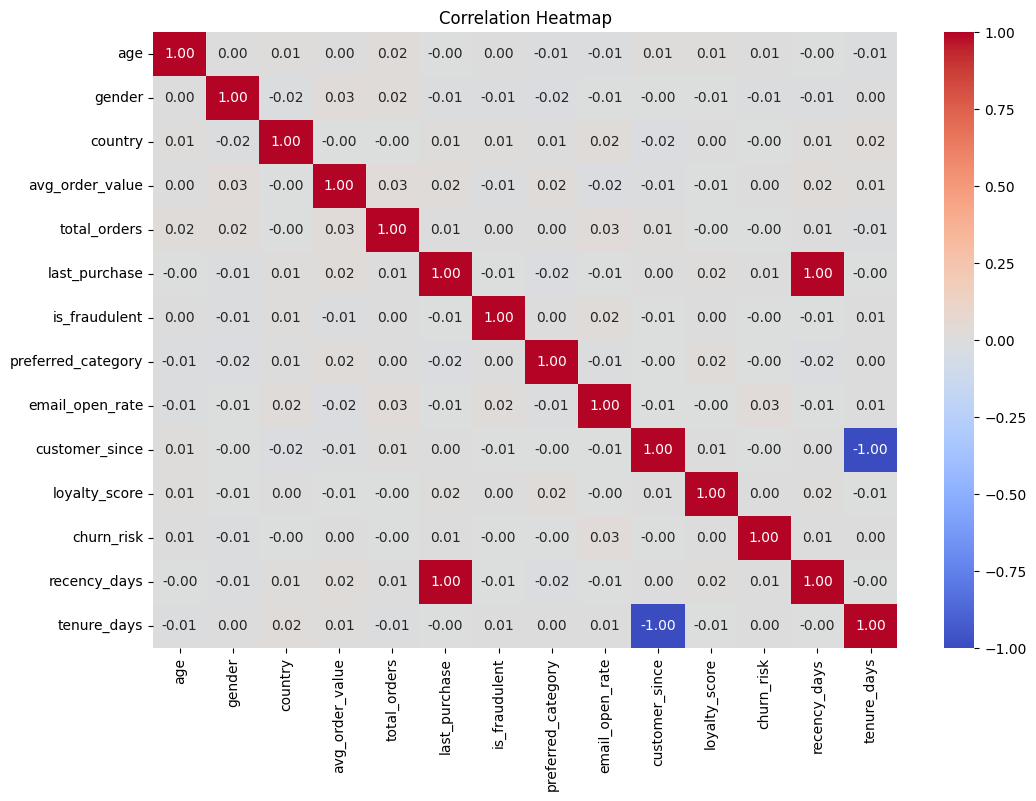

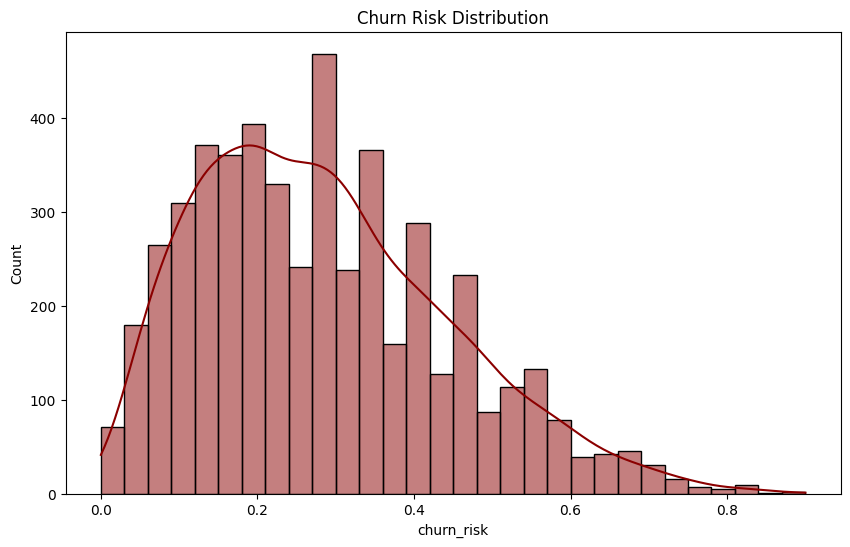

In [85]:
# 7. Drop customer_id if no use
df

# 8. Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 9. Visualize churn risk
plt.figure(figsize=(10,6))
sns.histplot(df['churn_risk'], bins=30, kde=True, color='darkred')
plt.title("Churn Risk Distribution")
plt.show()


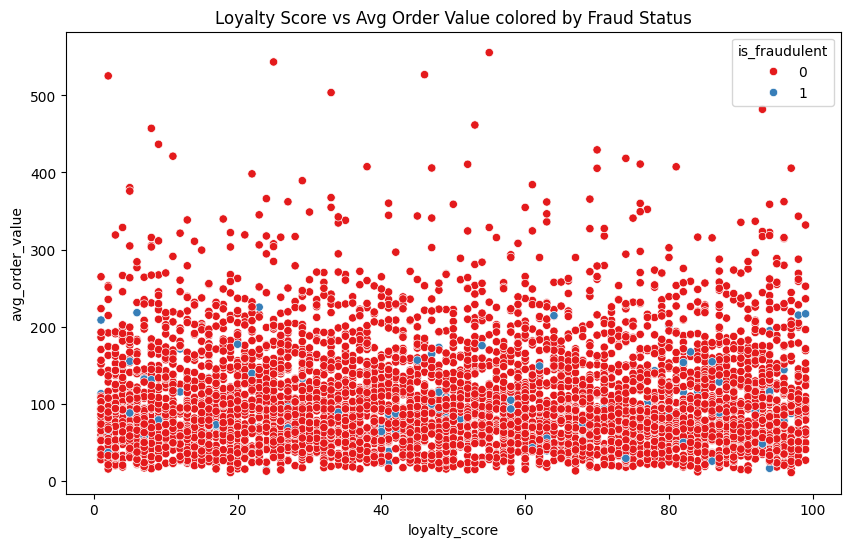

In [86]:
# 10. Average order value by loyalty score
plt.figure(figsize=(10,6))
sns.scatterplot(x='loyalty_score', y='avg_order_value', hue='is_fraudulent', data=df, palette='Set1')
plt.title("Loyalty Score vs Avg Order Value colored by Fraud Status")
plt.show()


In [87]:
# 11. Recency vs churn risk
fig = px.scatter(df, x='recency_days', y='churn_risk', color='is_fraudulent', title="Recency Days vs Churn Risk")
fig.show()

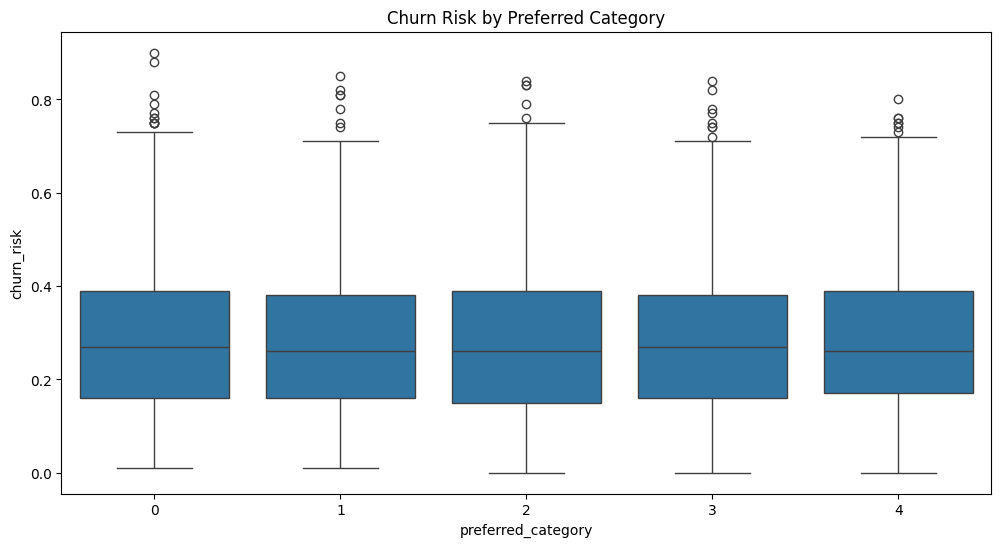

In [88]:
# 12. Boxplot of churn risk by preferred category
plt.figure(figsize=(12,6))
sns.boxplot(x='preferred_category', y='churn_risk', data=df)
plt.title("Churn Risk by Preferred Category")
plt.show()

In [89]:
df.columns

Index(['age', 'gender', 'country', 'avg_order_value', 'total_orders',
       'last_purchase', 'is_fraudulent', 'preferred_category',
       'email_open_rate', 'customer_since', 'loyalty_score', 'churn_risk',
       'recency_days', 'tenure_days'],
      dtype='object')

In [90]:
# 13. Fraud prediction
X = df.drop(['is_fraudulent',"customer_since"], axis=1)
y = df['is_fraudulent']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
num_cols = ['age','avg_order_value','total_orders','email_open_rate','loyalty_score','recency_days','tenure_days','churn_risk']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Random Forest Fraud Classification Report")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest Fraud Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1461
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.95      0.97      0.96      1500

[[1461    0]
 [  39    0]]


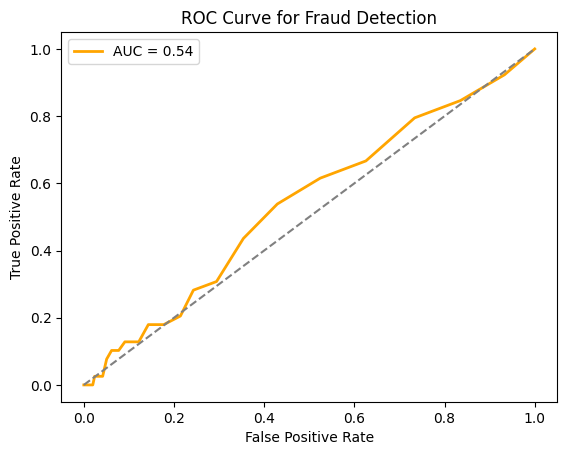

In [91]:
# 14. ROC
y_prob = clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, color='orange', lw=2, label=f'AUC = {roc_auc_score(y_test,y_prob):.2f}')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Fraud Detection")
plt.legend()
plt.show()

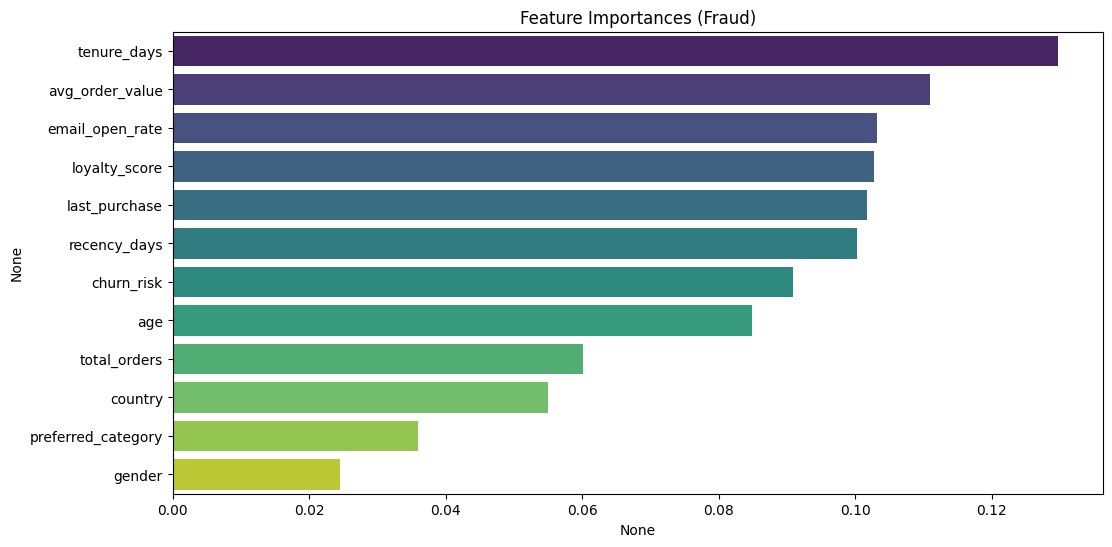

In [92]:

# 15. Feature importances
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=importances, y=importances.index, palette="viridis")
plt.title("Feature Importances (Fraud)")
plt.show()


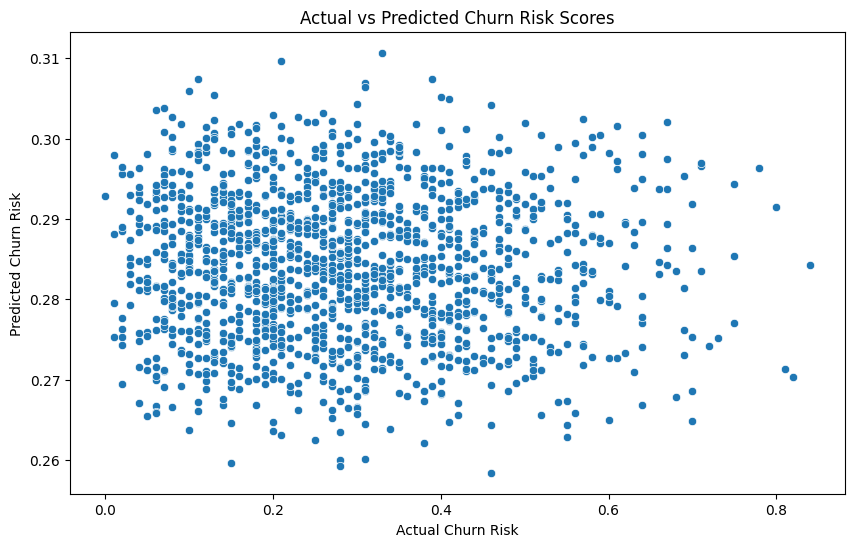

In [93]:

# 16. Churn risk regression
y_churn = df['churn_risk']
X_churn = df.drop(['churn_risk','is_fraudulent',"customer_since"], axis=1)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

X_train_c[num_cols[:-1]] = scaler.fit_transform(X_train_c[num_cols[:-1]])
X_test_c[num_cols[:-1]] = scaler.transform(X_test_c[num_cols[:-1]])

lr = LinearRegression()
lr.fit(X_train_c, y_train_c)
y_pred_c = lr.predict(X_test_c)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_c, y=y_pred_c)
plt.xlabel("Actual Churn Risk")
plt.ylabel("Predicted Churn Risk")
plt.title("Actual vs Predicted Churn Risk Scores")
plt.show()

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   age                 5000 non-null   int64         
 1   gender              5000 non-null   int64         
 2   country             5000 non-null   int64         
 3   avg_order_value     5000 non-null   float64       
 4   total_orders        5000 non-null   int64         
 5   last_purchase       5000 non-null   int64         
 6   is_fraudulent       5000 non-null   int64         
 7   preferred_category  5000 non-null   int64         
 8   email_open_rate     5000 non-null   float64       
 9   customer_since      5000 non-null   datetime64[ns]
 10  loyalty_score       5000 non-null   int64         
 11  churn_risk          5000 non-null   float64       
 12  recency_days        5000 non-null   int64         
 13  tenure_days         5000 non-null   int64       

Fraud Detection Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1461
           1       0.00      0.00      0.00        39

    accuracy                           0.97      1500
   macro avg       0.49      0.50      0.49      1500
weighted avg       0.95      0.97      0.96      1500



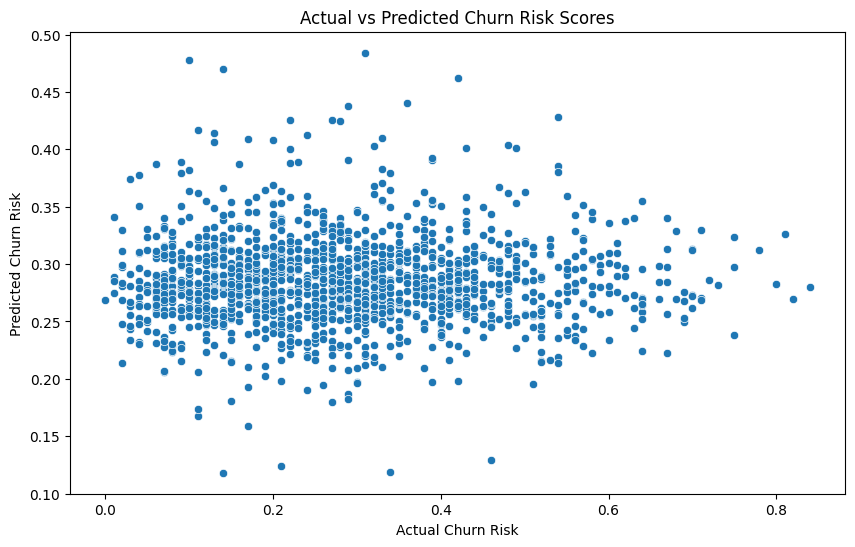

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Prepare data
df["customer_since"] = pd.to_datetime(df["customer_since"])
df["recency_days"] = df["last_purchase"]
df["tenure_days"] = (pd.Timestamp.today() - df["customer_since"]).dt.days

# Encode categorical features
le = LabelEncoder()
for col in ["gender", "country", "preferred_category"]:
    df[col] = le.fit_transform(df[col])

# Scale numeric columns
scaler = StandardScaler()
num_cols = ["age", "avg_order_value", "total_orders", "email_open_rate", "loyalty_score", "recency_days", "tenure_days"]
df[num_cols] = scaler.fit_transform(df[num_cols])

# Fraud prediction
X_fraud = df.drop(columns=["is_fraudulent", "customer_since", "churn_risk"])
y_fraud = df["is_fraudulent"]

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_fraud, y_fraud, test_size=0.3, random_state=42, stratify=y_fraud)

gbc = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
gbc.fit(X_train_f, y_train_f)
y_pred_f = gbc.predict(X_test_f)
print("Fraud Detection Report:")
print(classification_report(y_test_f, y_pred_f))

# Churn risk regression
X_churn = df.drop(columns=["churn_risk", "is_fraudulent", "customer_since"])
y_churn = df["churn_risk"]

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_churn, y_churn, test_size=0.3, random_state=42)

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=4, random_state=42)
gbr.fit(X_train_c, y_train_c)
y_pred_c = gbr.predict(X_test_c)

plt.figure(figsize=(10,6))
sns.scatterplot(x=y_test_c, y=y_pred_c)
plt.xlabel("Actual Churn Risk")
plt.ylabel("Predicted Churn Risk")
plt.title("Actual vs Predicted Churn Risk Scores")
plt.show()


In [96]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_f, y_train_f)

# Re-train with GradientBoostingClassifier on resampled data
gbc_smote = GradientBoostingClassifier(n_estimators=500, learning_rate=0.03, max_depth=6, subsample=0.8, random_state=42)
gbc_smote.fit(X_resampled, y_resampled)
y_pred_f_smote = gbc_smote.predict(X_test_f)

print("Improved Fraud Detection Report:")
print(classification_report(y_test_f, y_pred_f_smote))


Improved Fraud Detection Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1461
           1       0.11      0.03      0.04        39

    accuracy                           0.97      1500
   macro avg       0.54      0.51      0.51      1500
weighted avg       0.95      0.97      0.96      1500



In [97]:
from xgboost import XGBClassifier

# Further improvement using XGBoost with class weight scale
scale_pos_weight = (y_train_f == 0).sum() / (y_train_f == 1).sum()

xgb = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.01,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_resampled, y_resampled)
y_pred_xgb = xgb.predict(X_test_f)

print("Enhanced Fraud Detection Report:")
print(classification_report(y_test_f, y_pred_xgb))


Enhanced Fraud Detection Report:
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      1461
           1       0.02      0.13      0.04        39

    accuracy                           0.83      1500
   macro avg       0.50      0.49      0.47      1500
weighted avg       0.95      0.83      0.88      1500



In [98]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Base learners
estimators = [
    ('rf', RandomForestClassifier(n_estimators=300, max_depth=10, class_weight='balanced', random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=500, learning_rate=0.01, max_depth=6, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=scale_pos_weight, use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta learner
stacking_clf = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(class_weight='balanced', max_iter=1000),
    cv=5,
    passthrough=True,
    n_jobs=-1
)

# Train on resampled data
stacking_clf.fit(X_resampled, y_resampled)
y_pred_stack = stacking_clf.predict(X_test_f)

print("Stacked Model Fraud Detection Report:")
print(classification_report(y_test_f, y_pred_stack))


Stacked Model Fraud Detection Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1461
           1       0.07      0.03      0.04        39

    accuracy                           0.97      1500
   macro avg       0.52      0.51      0.51      1500
weighted avg       0.95      0.97      0.96      1500



In [99]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Train Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=500, contamination=0.01, random_state=42)
iso_forest.fit(X_train_f)

# Predict anomalies (-1 for anomaly, 1 for normal)
anomaly_scores = iso_forest.predict(X_test_f)
anomaly_pred = (anomaly_scores == -1).astype(int)  # 1 for fraud, 0 for not fraud

# Evaluate
print("Isolation Forest Anomaly Detection Report:")
print(classification_report(y_test_f, anomaly_pred))


Isolation Forest Anomaly Detection Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1461
           1       0.00      0.00      0.00        39

    accuracy                           0.96      1500
   macro avg       0.49      0.49      0.49      1500
weighted avg       0.95      0.96      0.96      1500



In [100]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import HistGradientBoostingClassifier

# Use SMOTETomek to handle both over- and under-sampling
smt = SMOTETomek(random_state=42)
X_balanced, y_balanced = smt.fit_resample(X_train_f, y_train_f)

# Train HistGradientBoostingClassifier optimized for imbalanced data
hgb = HistGradientBoostingClassifier(
    max_iter=1000,
    learning_rate=0.01,
    max_depth=7,
    class_weight='balanced',
    random_state=42
)
hgb.fit(X_balanced, y_balanced)
y_pred_hgb = hgb.predict(X_test_f)

print("Final Enhanced Fraud Detection Report:")
print(classification_report(y_test_f, y_pred_hgb))


Final Enhanced Fraud Detection Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1461
           1       0.10      0.08      0.09        39

    accuracy                           0.96      1500
   macro avg       0.54      0.53      0.53      1500
weighted avg       0.95      0.96      0.95      1500

